---
>「ムダが必要だと思うんだ。いろいろ練習して、自分の体に合ったものを見つける」\
>中野 浩一
---

# 強化学習

強化学習はReinforcement Learningの訳であり試行錯誤しながら最適な制御を実現する機械学習手法のひとつ
- 強化学習の概念は古く、1950年代に自立制御として存在、その後深層強化学習と呼ばれるディープラーニングを応用した手法が登場した
- 強化学習は教師あり学習に似ているが、明確な答えは提示されず、行動の選択肢と、その行動に対する報酬が与えられる

なお、強化学習に限っても様々な手法と考え方が存在している
- ここでは、連続行動空間ではなく、離散行動空間を考える
- 連続行動空間の場合、数式モデルによる古典制御などを用いた最適化なども想定されるため、手に負えないことからここでは敢えて触れない

強化学習の流れは次の通りである
- **エージェント(Agent)**がある**環境(Environment)**に置かれ、その環境に対して**行動(Action)**を起こす
  - エージェントはある条件で行動する主体であり、環境はエージェントを取り巻く周辺要素でエージェントに作用するものを指し、エージェントの環境に対するインタラクションを行動と呼ぶ
  
- 環境がエージェントに、行動により更新された**状態(State)**と**報酬(Reward)**をフィードバックする
  - 状態はエージェントが存在する仮想空間の情報で行動により更新される
  - エージェントの行動指針として報酬を利用する
    - 望ましい行動に対して正の報酬、望ましくない行動に対して負の報酬を与え、その程度を値の大きさで表現する

- ここで、「答え=報酬」ではないことに注意する
  - 強化学習においては、行動と報酬は直結しておらず、行動や行動の連続により環境がどのように変化したかなど、多角的に報酬が与えられる

- 環境からのフィードバックを元に**方策(Policy)**を修正する
  - エージェントは、行動に対する状態と報酬のフィードバックを元に、将来得られる価値を最大化する方策を導き出す
  - 方策の導出に用いられるのが**状態価値関数**と**行動価値関数**である
    - 状態価値関数は、ある状態$s$において、エージェントが方策$\pi$を実行した際に得られる価値を求める
    - 行動価値関数は、エージェントがランダムな行動$a$を実行した後に方策πを実行した際に得られる価値を求める
  - 両方ともに最終的に方策$\pi$を実行しているが、行動価値関数はランダムな行動$a$をとるが、この行動により得られる価値が増えるならば、行動$a$を方策の一部として採用して方策を修正する

- これまでの一連の行動の結果として変化した環境の中で、再びエージェントが環境に対して行動を起こす

以上の、行動し、その行動による環境の変化と報酬のフィードバックをえて、その行動を取った場合と取らなかった場合の価値を比較し方策を修正するというサイクルを繰り返すことで強化学習が進む

## 価値反復法




### 定式化

次のように定式化する
- 状態空間(環境がとりうる状態の集)を$\mathcal{S}=\{s_1,\ldots,s_m\}$、行動空間(エージェントがとりうる行動の集合)を$\mathcal{A}=\{a_1,\ldots,a_n\}$、施策(ポリシー)を$\pi(s,a)=P(a_t=a|s_t=s)$、報酬関数を$r_{t+1}=r(s_t,a_t)$とする
- エージェントは時刻$t$の状態$s_t$において、政策$\pi$にしたがって行動$a_t$を選択し、次の状態$s_{t+1}$に遷移して、報酬$r_{t+1}$を得るとする

行動$a$を重ねるごとに受け取る報酬$r$について、時刻やステップなど、時間的遷移を付与して$r_t$と表現する



### 報酬の表現

その将来受け取るであろう全報酬を**報酬和**$G_t$と呼び、
$$
G_t = r_{t+1}+r_{t+2}+r_{t+3}+\cdots
$$
となる

ここで、今すぐもらえる報酬と、将来もらえる報酬を等価に扱うことが学習を進めるうえでよいことか？ということを考える必要がある
- 将来の成功はその都度うまくいったという積み重ねであり、将来を狙っても状況の変換に追従できなければ元も子もない
- さらに、例えば10ステップで実現できる場合と、5ステップで実現できる場合で、ステップを踏むことに負の報酬がない場合は、ステップに関わらずどちらも同じ報酬を得ることになり、早く報酬を得たことに対するメリットが得られない
- これらを解決手法として**時間割引**があり、具体的には**時間割引率**$\gamma(0<\gamma<1)$を導入して、次の**割引報酬和**を用いる

$$
G_t = r_{t+1}+\gamma r_{t+2}+\gamma^2 r_{t+3}+\cdots
$$



### 行動価値と状態価値



#### 行動価値

時刻$t$においてある状態$s$にあり、行動$a$を選択したときに得られる報酬が$r(s,a) = r_{t+1}$とすると、行動価値関数$Q$は、$Q(s,a) = r_{t+1}$となる
- エージェントは最もQ値の高い行動を選択することになる

例えば、先に示した迷路を解くという問題では、Qテーブルは、S1からS9の全状態について、それぞれ4つの行動が想定されており、これを表にして期待できる報酬を記載したテーブルである

<img src="http://class.west.sd.keio.ac.jp/dataai/text/Qtable.png" width=300>

Q学習は強化学習の一種で、各状態と行動の組み合わせにQ値を設定したテーブルを用いて学習する  
- エージェントは最もQ値の高い行動を選択し、Q-Tableの各値が最適化されることで学習が進む


#### 状態価値

状態$s$において方策$\pi$に従って行動することで、その後将来に渡って得られることが期待される割引報酬和$G_t$を状態価値と呼ぶ

これを一般的に表現したのがベルマンの方程式であり次のように表す

$$
V^\pi(s) = max_a\mathbb{E}[r_{s,a}+\gamma\times V^\pi(s_{(s,a)})]
$$

ここで、
- $V^\pi(s)$: 状態$s$での状態価値$V$であり、左辺値が最も大きくなる行動$a$を選択したときに期待される値
- $s_{(s,a)}$: 状態$s$で行動$a$を選択して移動した次の状態$s_{t+1}$

であり、ベルマン方程式は、新たな状態$s_{t+1}$における状態価値$V$に1ステップ分の時間割引率を掛けた項に即時報酬$r_{s,a}$を加えた値の最大値を現在の状態価値とする式
- ベルマン方程式が成り立つためには学習過程がマルコフ決定過程であることが必要
- マルコフ決定過程とは、定常性(常にその発生確率などは一定)、独立性(過去や未来の事象の発生が現在に影響しない)、希少性(同時に複数のイベントが発生しない)を満たす過程


## SarsaとTD誤差

行動価値関数$Q$が望ましい値になるように更新学習するための一手法

ベルマンの方程式において、行動価値関数$Q(s,a)$が正しく求まっていれば、

$$
Q_(s_t, a_t) = r_{t_+1}+\gamma Q(s_{t_1}, a_{t+1})
$$

と表すことができる

学習途中では行動価値関数が決定できていない場合は、この式の等式が成り立たず、誤差が生じる
- この誤差(右辺-左辺)をTD誤差(Temporal difference error)と呼び
$$
TD_{error} = r_{t+1}+\gamma Q(s_{t_1}, a_{t+1})-Q(s_t, a_t)
$$
と表現される

TD誤差が0になれば行動価値関数が求まったことになるが、この$Q$の更新式は学習率$\eta$とすると次のように表すことができる

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t)+\eta \times (r_{t+1}+\gamma Q(s_{t+1}, a_{t+1})-Q(s_t, a_t))
$$


## $\varepsilon$-greedy法

$Q$値が最も大きくなる行動を選択しようとする場合、より良い選択をどのように探索する手法が必要

そこで、エピソード初期はあえてランダムに行動を選択し、エピソードを重ねるに従いQ値に基づいて選択する代表的な方法が$\varepsilon$-greedy法

この$\varepsilon$-greedy法として、例えば
- 確率$\varepsilon$でランダムに行動選択する
- 確率$1-\varepsilon$で$Q$が最大になる行動を選択する

などの方法がある

## Q学習


### Q学習の概要

一般に次のような形態となり、プログラム構造もこれに倣って設計される

主な構成要素は次の3つ
- Agent (行動を司る実態)
- Environment (Agentが行動する環境)
- Brain (行動を決定する頭脳)

1. 行動: Agentが環境に実際に行動する
1. 状態更新・報酬: 環境が変化しそれによって次の状態を伝えると共に報酬を返す
1. 状態通知: AgentがBrainに現在の状態・行動・次の状態・報酬等の情報を伝える
1. 判断: 状態通知内容をもとに行動決定の施策を練ることで、Qテーブルの更新などが該当する
1. 行動指示: BrainがAgentにとるべき行動を指示する

### 迷路の解法におけるQ学習

例えば、強化学習で迷路を解くという問題を例に説明する
次のような迷路を想定する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/maze1.png" width=200>

ここでエージェントは迷路を解く人を意味し、環境は迷路である

- 行動：まず、迷路を解く上では、行動とはエージェント(人)が迷路を移動することに該当する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/maze2.png" width=200>

この場合、いけない場所があるかもしれないが、検討する移動方向は上下左右の4つであり、この中から一つの行動を選択する

- 状態：迷路を解く上での状態とは、迷路の中でどこにいるかを表し、行動により変化する
  - ここではS1からS9の状態をとる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/maze3.png" width=200>

- 報酬：例えばエージェントがゴールに到達すれば+1の報酬を手に入れ、途中の罠にはまれば-1の報酬を手に入れる
  - これで、罠を避けつつゴールに行くようになるであろう
  - 最短コースを選択するようにするのであれば、歩数を報酬に入れるとよい
  - この例では答えが報酬になってしまっているが、これは必須ではない

<img src="http://class.west.sd.keio.ac.jp/dataai/text/maze4.png" width=200>

- 方策：状態を考慮してエージェントがどのように行動するべきかを定めたルールであり、あとから出てくるQテーブルが該当する
  - この場合のQテーブルは次のようなイメージであり、例えばS1の状態では、右に進めば罠に近づくためマイナスの値となっており、下に進めばゴールに近づくためプラスの値を与える

<img src="http://class.west.sd.keio.ac.jp/dataai/text/Qtable.png" width=300>


### Q学習の更新式

Saraの更新式は

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t)+\eta \times (r_{t+1}+\gamma Q(s_{t+1}, a_{t+1})-Q(s_t, a_t))
$$

と与えられ、行動価値関数$Q$の更新に次の行動$a_{t+1}$を利用する
- これを方策オン型と呼ぶ

Q学習の更新式は

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t)+\eta \times (r_{t+1}+\gamma max_a Q(s_{t+1}, a)-Q(s_t, a_t))
$$

と与えられ、状態$s_{t+1}$の行動価値関数の値のうち最も大きい場合で更新する
- これを方策オフ型と呼ぶ
- Q値の更新量 = 学習係数x(**報酬**+割引率x**次の状態で最大のQ値**-現在のQ値)である
  - 学習係数$\eta$は0.1といった値が用いられる
- 行動の結果得られた報酬と次の状態で最大のQ値（割り引かれる）から現在のQ値を差し引くことを意味する
- $\varepsilon$-greedy法をのようなランダム性が更新式に含まれないため、就職がSarsaよりも速くなる

## Q学習の例

ここでは、深層強化学習ではなく、Qテーブルのみ利用した簡単なQ学習を実装し、機械学習の仕組みについて理解する
- 深層ではないため、PyTorchは用いず、NumPyとmatplotlibのみ用いる
- 一般にQテーブルは巨大になるためQテーブルの学習にDNNを応用するが、この応用については後述する

ここでは、飛べ！飛行船ゲームにトライする
- エージェントは飛行船であり、基本的には自由落下するが、ジェット噴射で上向き加速度を与えることができる
  - 選択できる行動は上下方向のみで、行動は2つ、自由落下行動0と、ジェット噴射行動1のみ
- フィールドを左から右へ等速度で運動する
- フィールドの下端は墜落、上端は空気が薄いため、どちらもゲームオーバー

このゲームを訓練するが、報酬は飛行船が右端まで到達したときに+1、ゲームオーバーの時-1とする


In [ ]:
cuda = "cuda:0"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## Brainクラス
まず、エージェントの頭脳となるBrainクラスを設計する

より多くの報酬が得られるようにQ-TableのQ値を調整、Q値の更新量は次式で表現可能
- `Q値の更新量 = 学習係数 x ( 報酬 + 割引率 x 次の状態で最大のQ値 - 現在のQ値 )  `
  
Brainクラスの`get_action`メソッドは、ある状態における行動をε-greedy法により選択
- 従って、学習初期はランダムに行動が選択され、学習が進むと徐々にQ値の高い行動が選択されるようになる


In [ ]:
class Brain:
    def __init__(self, n_state, w_y, w_vy, n_action, gamma=0.9, r=0.99, lr=0.01):
        self.n_state = n_state  # 状態の数
        self.w_y = w_y  # 位置の刻み幅
        self.w_vy = w_vy  # 速度の刻み幅
        self.n_action = n_action  # 行動の数
        self.eps = 1.0  # ε
        self.gamma = gamma  # 割引率
        self.r = r  # εの減衰率
        self.lr = lr  # 学習係数
        self.q_table = np.random.rand(n_state*n_state, n_action)  # Q-Tableを乱数で初期化

    def quantize(self, state, n_state, w):  # 状態の値を整数のインデックスに変換
        min = - n_state / 2 * w
        nw = (state - min) / w
        nw = int(nw)
        nw = 0 if nw < 0 else nw
        nw = n_state-1 if nw >= n_state-1 else nw
        return nw

    def train(self, states, next_states, action, reward, terminal):  # Q-Tableを訓練
        i = self.quantize(states[0], self.n_state, self.w_y)  # 位置のインデックス
        j = self.quantize(states[1], self.n_state, self.w_vy)  # 速度のインデックス
        q = self.q_table[i*self.n_state+j, action]  # 現在のQ値

        next_i = self.quantize(next_states[0], self.n_state, self.w_y)  # 次の位置のインデックス
        next_j = self.quantize(next_states[1], self.n_state, self.w_vy)  # 次の速度のインデックス
        q_next = np.max(self.q_table[next_i*self.n_state+next_j])  # 次の状態で最大のQ値

        if terminal:
            self.q_table[i*self.n_state+j, action] = q + self.lr*reward  # 終了時は報酬のみ使用
        else:
            self.q_table[i*self.n_state+j, action] = q + self.lr*(reward + self.gamma*q_next - q)  # Q値の更新式

    def get_action(self, states):
        if np.random.rand() < self.eps:  # ランダムな行動
            action = np.random.randint(self.n_action)
        else:  # Q値の高い行動を選択
            i = self.quantize(states[0], self.n_state, self.w_y)
            j = self.quantize(states[1], self.n_state, self.w_vy)
            action = np.argmax(self.q_table[i*self.n_state+j])
        if self.eps > 0.1:  # εの下限
            self.eps *= self.r
        return action

## エージェントのクラス

エージェントクラスは、実際に行動し報酬を受け取るように実装

- x座標が-1から1、y座標が-1から1の正方形の領域を考え、エージェントの初期位置は左端中央とする
- エージェントが右端に達した際は報酬として1を与え終了とする
- エージェントが上端もしくは下端に達した際は報酬として-1を与え、終了とする
- x軸方向には等速度で移動
- 行動は自由落下とジャンプの2種類
 - 自由落下の場合は重量加速度をy速度に加える
 - ジャンプの場合はy速度を予め設定した値に変更

In [ ]:
class Agent:
    def __init__(self, v_x, v_y_sigma, v_jump, brain):
        self.v_x = v_x  # x速度
        self.v_y_sigma = v_y_sigma  # y速度、初期値の標準偏差
        self.v_jump = v_jump  # ジャンプ速度
        self.brain = brain
        self.reset()

    def reset(self):
        self.x = -1  # 初期x座標
        self.y = 0  # 初期y座標
        self.v_y = self.v_y_sigma * np.random.randn()  # 初期y速度

    def step(self, g):  # 時間を1つ進める g:重力加速度
        states = np.array([self.y, self.v_y])
        self.x += self.v_x
        self.y += self.v_y

        reward = 0  # 報酬
        terminal = False  # 終了判定
        if self.x>1.0:
            reward = 1
            terminal = True
        elif self.y<-1.0 or self.y>1.0:
            reward = -1
            terminal = True
        reward = np.array([reward])

        action = self.brain.get_action(states)
        if action == 0:
            self.v_y -= g   # 自由落下
        else:
            self.v_y = self.v_jump  # ジャンプ
        next_states = np.array([self.y, self.v_y])
        self.brain.train(states, next_states, action, reward, terminal)

        if terminal:
            self.reset()

## 環境のクラス

環境をクラスとして実装
- 役割は重力加速度を設定し時間を前に進めることのみ

In [ ]:
class Environment:
    def __init__(self, agent, g):
        self.agent = agent
        self.g = g  # 重力加速度

    def step(self):
        self.agent.step(self.g)
        return (self.agent.x, self.agent.y)

## アニメーション
今回は、matplotlibを使ってエージェントの飛行をアニメーションで表します。  
アニメーションには、matplotlib.animationのFuncAnimation関数を使用します。  

In [ ]:
def animate(environment, interval, frames):
    fig, ax = plt.subplots()
    plt.close()
    ax.set_xlim(( -1, 1))
    ax.set_ylim((-1, 1))
    sc = ax.scatter([], [])
    def plot(data):
        x, y = environment.step()
        sc.set_offsets(np.array([[x, y]]))
        return (sc,)
    return animation.FuncAnimation(fig, plot, interval=interval, frames=frames, blit=True)

## ランダムな行動

比較としてエージェントがランダムに行動する例を試す
- `r`の値を1に設定しεが減衰しないようにする
 - これでエージェントは完全にランダムな行動を選択する

実行には、10分程度必要
- 結果を再生すると、運良く右端に到達することもあるが多くの場合ゲームオーバーとなることがわかる

In [ ]:
n_state = 50
w_y = 0.2
w_vy = 0.2
n_action = 2
brain = Brain(n_state, w_y, w_vy, n_action, r=1.0)  # εが減衰しない

v_x = 0.05
v_y_sigma = 0.1
v_jump = 0.2
agent = Agent(v_x, v_y_sigma, v_jump, brain)

g = 0.2
environment = Environment(agent, g)

anim = animate(environment, 50, 1024)
rc("animation", html="jshtml")
anim

Output hidden; open in https://colab.research.google.com to view.

## Q学習の導入

`r`の値を0.99に設定しεが減衰するようにする
- Q学習の結果が行動に反映されるようになる

In [ ]:
n_state = 50
w_y = 0.2
w_vy = 0.2
n_action = 2
brain = Brain(n_state, w_y, w_vy, n_action, r=0.99)  # εが減衰する

v_x = 0.05
v_y_sigma = 0.1
v_jump = 0.2
agent = Agent(v_x, v_y_sigma, v_jump, brain)

g = 0.2
environment = Environment(agent, g)

anim = animate(environment, 50, 1024)
rc("animation", html="jshtml")
anim

Output hidden; open in https://colab.research.google.com to view.

学習が進むと、上下の端にぶつらずに右端まで飛べるようになる

## 深層強化学習

ディープラーニングは、特に複雑な特徴量入力から自律的に特徴抽出を行うことができるが、強化学習における環境からの複雑な入力から特徴を抽出し、行動を得ることで、自律的特徴抽出と自律制御に応用できる

エージェントは環境の知識は事前に持たないため、自ら探索し情報収集することが必要であり、これが強化学習における特徴量抽出に相当する

さらに、エージェントは環境を把握した上で長期的な価値を最大化するであろう行動を時系列と各行動の相互の影響を考慮して行動を決定し、これが強化学習における時系列データ生成に相当する

この両方に効果的に利用できるのがディープラーニングである
- 入力データが画像である場合、特徴量抽出にCNNが用いられ、時系列データである倍RNNが用いられることが多いが、様々な層構造の応用が想定される

# Deep Q-Network(DQN)

- すべての状態数と行動数が把握できるのであれば、これをすべて記述してテーブルをこうせいすればよいが、一般に状態数や行動数は大きく、組み合わせの数も膨大となり計算が困難となる
- そこでDQNでは$Q$をテーブルではなく、関数や学習モデルで近似する
- 構築する深層学習モデルは、状態×行動を入力とせず、状態を入力して行動のQ値を出力するモデルとなる


## Q-Netowrk

DQNにおけるニューラルネットワークの構造をQ-Networkと呼ぶ
- 特に深層ニューラルネットワークを用いる場合にDQNと呼ぶ


## TD学習とQ-learning

ここで扱う手法はTD学習(Temporal Difference learning)と呼ばれる

TD学習は強化学習の手法の一つで、価値ベースの手法である
- 次の式のように行動価値関数$Q$についてTD誤差を求め、これが0になるようにする
- Q-learningは行動価値関数$Q$で価値の高い行動を選択し、状態・報酬の観測を繰り返すことで、次の状態での$Q$の値と現時点での$Q$の値の間に生じるTD誤差を用い最適な行動価値関数を推定する手法

$$
Q(s_t,a_t){\leftarrow}(1-\eta)Q(s_t,a_t)+\eta(r_{t+1}-\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1}))
$$

左辺はQ値の更新値、右辺は現状態のQ値$Q(s_t,a_t)$、報酬$r_{t+1}$、行動後の状態のQ値の最大値$\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1})$を意味する

この式を変形すると、

$$
Q(s_t,a_t){\leftarrow}Q(s_t,a_t)+\eta(r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1})-Q(s_t,a_t))
$$

となり、$\eta(r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1})-Q(s_t,a_t))$の部分をTD誤差と呼ぶ

$Q(s_t,a_t)$を$r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1})$に近づけるため、後者を教師信号targetとして、現在の$Q$との誤差関数$L(s,a)$を使ってネットワークを学習させる

$$
target=r_{t+1}+\gamma\max_{a_{t+1}}Q(s_{t+1},a_{t+1})
$$
$$
L(s,a)=\frac{1}{2}(target-Q(s,a))^2
$$

## DQNにおけるテクニック

DLにおいても様々なテクニックが利用され、その進歩に貢献したように、DQNにおいても次のようなテクニックが提案され、利用されている


### **Experience Replay**

エージェントが繰り返し行動し、得られた経験(Experience)を時系列に獲得するが、経験に相関があるとネットワークが過学習するためこれを避ける
- 時刻$t$と時刻$t+1$のの学習内容は類似し、類似した部分のみ学習が進行しやすい
- 解決のためにミニバッチに類似した方針として、経験をメモリに保存し、そのメモリの中から経験をランダムに選んで(Replay)学習させる


### **Prioritized Experience Replay**

Experience Replayについて、ランダムに選択せず、優先順位を付けて選択する
- 例えば、教師信号との差を求め、その差が大きい学習内容を優先的に選択するなど

具体的にはTD誤差に相当する、次の項
$$
r_{t+1}+\gamma Q_t(s_{t+1},a_{t+1})-Q(s_t,a_t)
$$

の値が大きいtransitionを優先的にExperience Replay時に学習させる

実装する際には、値の大きいtransisionを探すために探索問題を解くことになり、例えば2分木探索を行う手法が提案されている


### **Fixed Target Q-Network**

行動を決定するmain-networkと誤差関数の計算時に行動価値を決めるtarget-networkの2種類を用いる
- 更新の「時刻差」を用いており、main-networkとtarget-networkが完全に独立しているわけではない
- 完全に独立して持たせるのは、次のDDQN

その内容は次の通り

- DQNでは価値関数$Q(s_t,a)$を更新するが、それには次の時刻の状態$s_{t+1}$での価値関数$Q(S_{t+1}, a)$が必要となり、Q関数の更新のために同じQ関数を利用すると学習が不安定になりやすい

- そこで更新に必要な$max_a Q(s_{t+1}, a)$を求める際に、時刻を遡った(ネットワークパラメータの更新タイミングにおいて前の)別のQ関数(Fixed Target Q-network)を用いて計算する
  - target-networkは定期的にmain-networkで上書きする
- Fixed Target Q-Netowrkは、Freezing the target networkとも呼ばれ、より具体的には、TD誤差の目標値に古い$Q$(target Q-network)を使うことである
  - $L_{\theta}(s_t,a)=\frac{1}{2}(r_{t+1}+\gamma\max_aQ_{\theta^{-1}}(s_{t+1}, a)-Q_{\theta}(s_t,a))^2$  
  とする
  - 一定周期で学習中の$Q_\theta$のパラメータと同期させるため、次のようにする$(\theta^{-1}\leftarrow\theta)$


### **DDQN (Double-DQN)**

Fixed Target Q-Networkでは同一ネットワークの時刻差を用いるが、DDQNでは完全に独立した2つのネットワークを利用する

まず、TD学習でも利用した式を、main Q-Netowrkを$Q_m$、target Q-Netowrkを$Q_t$として明確に分けて記述すると次のようになる

$$
Q_m(s_t,a_t){\leftarrow}Q_m(s_t,a_t)+\eta(r_{t+1}+\gamma\max_{a_{t+1}}Q_t(s_{t+1},a_{t+1})-Q_m(s_t,a_t))
$$

このように、次の状態$s_{t+1}$での$Q$値が最大となる行動$a = a_{t+1}$およびその時の$Q$値の2つをTarget Q-Networkから求める

DDQNではこれをさらに安定させるため、次のような更新式を利用する

$$
a_m = arg \max_a Q_m(s_{t+1}, a_{t+1})
$$

$$
Q_m(s_t,a_t){\leftarrow}Q_m(s_t,a_t)+\eta(r_{t+1}+\gamma Q_t(s_{t+1},a_m)-Q_m(s_t,a_t))
$$

このように、次の状態$s_{t+1}$での$Q$値が最大となる行動$a_m$はMain Q-Networkから求め、その行動$a_m$での$Q$値はTarget Q-Netowrkから求める

- Main Q-Networkの更新量を2つのネットワークを使用して求めるためDouble DQNと呼ばれる


### **Huber関数**

二乗誤差関数を用いずHuber関数を用いて計算する手法

- Huber関数は次の通りで、例えば$\epsilon=1$として、$-1<x<1$の範囲で$y=\frac{1}{2}x^2$、それ以外で$y=|x|-\frac{1}{2}$とすることで、誤差が大きいときに誤差関数の結果が二乗と大きくなるため学習が不安定になる問題を解決

$$
H(x)=\left\{\begin{array}{ll}x^2/2 & \text{if }|x|\le\epsilon\\\epsilon|x|-\epsilon^2/2&\text{otherwise}\end{array}\right. |x|\le\epsilon
$$

<img src="http://class.west.sd.keio.ac.jp/dataai/text/huber.JPG" width="300">

### **Clipping Rewards**: 報酬のスケールを、正スコア+1、負スコア−1などと統一する
- 結果として学習対象に依存せず、同じハイパーパラメータでDQNを実行できる


### **Dueling Network**

行動価値関数$Q(s,a)$の出力層において状態価値$V(s)$とアドバンテージ関数$A(s,a) = Q(s,a)-V(s)$を配置する手法
- 数式表現上はこれで正しいが、実際にはネットワーク構造上の表現で理解する方がわかりやすく、次のような層構造となる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/Q2Dueling.png" width="500">

- $V(s)$は行動価値が最大となる行動を採用したときの$Q$値ではなく、**全行動の平均の$Q$値となる**
- meanすなわち平均を引くことで、行動の種類により異なるバイアスが加わること排除し、学習を安定化させる
  - 誤差逆伝播では、どのような指令でも必ず全ネットワークを更新でき、同程度の重みで指令を生成するようになる
  - つまり、とった行動の違いに依存せず状態価値$V(s)$を得ることができるため、学習性能が向上する

### **A3C**

Asynchronous Advantage Actor-Criticの略

3つのAから始まる手法を用いることを意味する
- Asynchronous: GORILA(General Reinforcement Learning Architecture)で提案されたように、複数のエージェントを用意して分散学習させる手法を利用する
- Advantage: Q学習の更新において1ステップ先の状態を使用するが、2ステップ先以上を用いて更新するAdvantage手法を利用する

更新式を定式化すると次の通りとなる
$$
Q(s_t,a_t) = r_{t+1}+\gamma r_{t+2}+\gamma^2\max_a Q(s_{t+2}, a)
$$

- Actor-Critic: 強化学習における方策反復法と価値反復法の両方を組み合わせた手法を利用する  
  Actor側出力: 方策反復法と同じで状態$s_t$に対して行動それぞれがどの程度お勧めかを示す
  - これをsoftmax関数に入力すれば行動の採用確率のように表現できる
  - Actor学習に次の方策のエントロピー項が加えられることが多い
$$Actor_{entropy} = \sum^a[\pi_\theta(a|s)log \pi_\theta(a|s)]
$$
  ここで、行動の種類について総和を計算しており、方策が行動をランダムに選択する学習初期では最大の値となり、どれか一つの行動しか選択しない場合最小となるように設計されており、このエントロピーをActorの誤差関数から引くことで学習初期はパラメータ学習がゆっくりと進み、局所回に落ちるのを避ける狙いがある

  Critic側出力: 状態の価値$V^\pi_{s_t}$であり、状態$s_t$になった場合にその先得られるであろう割引報酬和の期待値となる
    - この割引報酬和$J(\theta, S_t)$は、$\mathbb{E}$をミニバッチ平均で期待値を表すとすると
$$
J(\theta, S_t) = \mathbb{E}[log \pi_\theta(a|s)(Q^\pi(s,a)-V^\pi_s)]
$$
となる
    - $log \pi_\theta(a|s)$は状態$s$の時に行動$a$を選択する条件付確率の$log$を意味する
    - $Q^\pi(s,a)$は状態$s$で行動$a$を選択する場合の行動価値を表し、行動$a$に対する定数であり、Advantage学習で求める  
  状態価値$V^\pi_s$を正しく出力できるように学習させたいため、実際に行動して得られる行動価値$Q^\pi(s,a)$と出力$V^{\pi}_{s}$が一致するようにすることから、損失関数は$Loss_{critic}=(Q^\pi(s,a)-V^\pi_s)^2$とする


### **UNREAL**

UNsupervised Reinforcement and Auxiliary Learningの略

- 最終目的となる課題(環境)を用いて学習を完結させるのではなく、その傍題となるより簡易な補助問題を用いて学習させ、この補助問題を徐々に高度化させることで最終的に本来の問題に対応させる手法
- 要するにいきなり難しい問題に取り組むのではなく、徐々に難しくする手法、この問題を考えて与えるのは人間

**Skipping frames**: 計算コストを削減するという観点から毎フレーム行動選択を行わず、数フレームおきに行動選択する


# OpenAI Gymによる強化学習環境設計とDQNによる強化学習

〇×ゲーム(英語でTicTacToe)程度であれば一から構成可能であるが、今後の拡張を考えて非営利団体 OpenAIが提供する強化学習の開発・評価用のプラットフォームOpenAI Gymを利用する

強化学習は、与えられた環境(Environment)の中で、エージェントが試行錯誤しながら報酬を最大化する行動を学習する機械学習アルゴリズムである
- エージェントの学習アルゴリズムに加えて環境も重要な要素となることから、強化学習用の環境を共通インターフェイスを提供する
- 実験結果をアップロードし他のアルゴリズムと比較することができる
- 完全に準備されていればそれを用いるが、準備されていない場合でも独自環境を構築することで上記メリットをえることができる

まず最初に必要なモジュールを読み込む

In [ ]:
#import click
#import sys
import numpy as np
import random
import gym
from gym import spaces
from collections import namedtuple

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

## 環境構築

gym.Envを継承し、次の関数を準備したのち、`gym.envs.registration.register`関数を用いてgymに登録することで環境が利用可能となる

次のメソッドを揃えたクラスを設計する
- `_step(self, action)`: action を実行し、その結果を返すメソッド(必須)
- `_reset(self)`: 環境の状態を初期化し最初の観測値を返すメソッド(必須)
- `_render(self, mode='human', close=False)`: 環境を可視化するメソッド(必須)、の引数の`mode`はclass毎に受け取れる任意の文字列を指定し、慣習として以下を列挙する
  - `human`: 人が操作できるように画面表示を行うこと意味し、戻り値はない  
  特に実際のゲーム画面を利用する場合は、画像表示に`gym.envs.classic_control.rendering.SimpleImageViewer`が利用でき、`rgb_array`で画面の画像情報をnumpy.array型(x, y, 3)のRGBピクセル配列で返し、`ansi`では文字列もしくはStringIOで返す
- `_close(self)`:	環境を閉じて後処理をするメソッド(必須ではない)
- `_seed(self, seed=None)`: 乱数にシードを与えるメソッド(必須ではない)

また、次のメンバ変数をプロパティとして与える
- `action_space`: Actionが及ぶ空間(入力)
- `observation_space`: Observationが及ぶ空間(出力)
- `reward_range`: 報酬の最小値と最大値のリスト


## 状態空間と行動空間の型

OpenAI Gymの空間として、**Box**(連続値)と**Discrete**(離散値)があり、状態空間は多くがBoxで表現され、行動空間はDiscreteの方がより学習が容易となる
- Box: 範囲[low、high]の連続値、Float型のn次元配列  
`gym.spaces.Box(low=-100, high=100, shape=(2,))`

- Discrete: 範囲[0、n-1]の離散値、Int型の数値  
`gym.spaces.Discrete(4)`

- MultiBinary: ステップ毎に任意の行動を任意の組み合わせで使用できる行動リスト  
`gym.spaces.MultiBinary(5)`

- MultiDiscrete: ステップ毎に各離散セットの1つの行動のみ使用できる行動リスト  
`gym.spaces.MultiDiscrete([-10,10], [0,1])`


## 実際の環境の宣言


### プロパティの宣言
- `reward range` で報酬の値の範囲を設定、ここでは制限なし
- `observation_space`で盤面の入力を定義
  - 0が駒無し、1がCOMの駒、2がPLAYERの駒であり3種類、よって、9x9の盤面で、ワンホットになっている
- `action_space`は、どこに駒を置くかを指定するため9個のワンホットで指定する
- `winning_streaks`は全ての勝ちパターンであり、ここに並べた駒の位置のいずれかで3つ並びが完成する


### `__init__`
- `summary`にゲームの結果を保存するためその初期化を行う
- 一般的にはここで`_reset`を呼び出す場合が多いが、この場合は不要である


### `one_hot_board`
- `board`には盤面情報が保存されており、0が空白、1が注目プレイヤーで、2が相手プレイヤー1である(例えば`[1, 0, 0, 0, 2, 1, 0, 2, 1]`)
- この0,1,2をワンホットに変換するためにnp.eye(3)で3x3単位行列を作り、その第i行目を取得、これをブロードキャストし例えば
```
[[0, 1, 0]
 [1, 0, 0]
 [1, 0, 0]

 [1, 0, 0]
 [0, 0, 1]
 [0, 1, 0]

 [1, 0, 0]
 [0, 0, 1]
 [0, 1, 0]]
 ```
  とする

- さらに`reshape(-1)`で1次元配列に変換している
- プレイヤーが0つまりCOMか、1つまりHumanかで、注目プレーヤーを変更する。COMの場合はそのままでよいが、1の場合は上記の1と2を入れ替える必要がある(例えば、`[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]`)
  - 実際に学習に用いるのはこのワンホットのボード情報で、9x3の27個の数列で構成される
  - `observation_space`の宣言と一致する

### `_reset`
まずプレーヤーを0つまりCOMとし、boardを全て空白に初期化、one_hot_boardを生成する
- boardを変更したら必ずone_hot_boardを更新する


### `_step`
引数actionsで、取られた行動を取得する
- これは、学習中はNNの出力であったり乱数であったりし、Humanであればインタラクティブな入力の値となる
- 次に報酬計算を行う
  - 置いてはいけない場所に置いた場合-10ポイントとする
    - これはboardが0ではないことを確認すればよい
  - 置けるので、おいてしまう
  - 次のステップで相手が勝てるかどうかを3つ並び条件それぞれで調べて(for)、相手が勝つ場合-2ポイントとする
    - ブロードキャストを用いて巧妙に描かれているが、`2 - self.current_playe`は相手を表し、`self.board[streak]`は3つ並ぶパターンに入っている駒をブロードキャストで全て取り出しつつ、それが相手に一致すると1、一致しない場合は0であることから、一致数が2以上となり、残りが0つまり空白であれば相手が勝つことになる
    - この残りが0であることを調べるために、`(self.board[streak] == 0).any()`とし、anyつまりいずれか1つが0となることを確認している
  - 勝利していれば+1ポイント
    - `self.board[streak] == self.current_player + 1`はもうわかるであろう
  - 引き分けの場合は0ポイントとする
    - `(self.board != 0).all()`ももうわかるであろう
- プレーヤーを0(COM)でああれば1(Human)に、1であれば0にする
- 最後にワンホットのボートの状態と、報酬、結果を返す

In [ ]:
class TicTacToe(gym.Env):
    reward_range = (-np.inf, np.inf)
    observation_space = spaces.MultiDiscrete([2 for _ in range(0, 9 * 3)])
    action_space = spaces.Discrete(9)
    winning_streaks = [
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 3, 6],
        [1, 4, 7],
        [2, 5, 8],
        [0, 4, 8],
        [2, 4, 6],
    ]
    def __init__(self, summary: dict = None):
        super().__init__()
        if summary is None:
            summary = {
                "total games": 0,
                "ties": 0,
                "illegal moves": 0,
                "player 0 wins": 0,
                "player 1 wins": 0,
            }
        self.summary = summary

    def _seed(self, seed=None):
        pass

    def one_hot_board(self):
        if self.current_player == 0:
            return np.eye(3)[self.board].reshape(-1)
        if self.current_player == 1:
            # permute for symmetry
            return np.eye(3)[self.board][:, [0, 2, 1]].reshape(-1)

    def _reset(self):
        self.current_player = 0
        self.board = np.zeros(9, dtype="int")
        return self.one_hot_board()

    def _step(self, actions):
        exp = {"state": "in progress"}
        # get the current player's action
        action = actions
        reward = 0
        done = False
        # illegal move
        if self.board[action] != 0:
            reward = -10  # illegal moves are really bad
            exp = {"state": "done", "reason": "Illegal move"}
            done = True
            self.summary["total games"] += 1
            self.summary["illegal moves"] += 1
            return self.one_hot_board(), reward, done, exp
        self.board[action] = self.current_player + 1
        # check if the other player can win on the next turn:
        for streak in self.winning_streaks:
            if ((self.board[streak] == 2 - self.current_player).sum() >= 2) and \
                (self.board[streak] == 0).any():
                reward = -2
                exp = {
                    "state": "in progress",
                    "reason": "Player {} can lose on the next turn".format(
                        self.current_player
                    ),
                }
        # check if we won
        for streak in self.winning_streaks:
            if (self.board[streak] == self.current_player + 1).all():
                reward = 1  # player wins!
                exp = {
                    "state": "in progress",
                    "reason": "Player {} has won".format(self.current_player),
                }
                self.summary["total games"] += 1
                self.summary["player {} wins".format(self.current_player)] += 1
                done = True
        # check if we tied, which ends the game
        if (self.board != 0).all():
            reward = 0
            exp = {
                "state": "in progress",
                "reason": "Player {} has tied".format(self.current_player),
            }
            done = True
            self.summary["total games"] += 1
            self.summary["ties"] += 1
        # move to the next player
        self.current_player = 1 - self.current_player
        return self.one_hot_board(), reward, done, exp

    def _render(self, mode: str = "human"):
        print("{}|{}|{}\n-----\n{}|{}|{}\n-----\n{}|{}|{}".format(*self.board.tolist()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DQNでは訓練にエクスペリエンス・リプレイ・メモリを利用する
- エージェントが観測した遷移を記憶し、後で再利用できるようにする
- ランダムに並び替えてバッチで利用される
  - これにより、DQNの学習手順が安定化する
- ここで、次の2つのクラスを用いて遷移を表現する
  - Transition: 記憶の一つの要素であり、ある一つの遷移を表す名前付きタプル
    - 基本的には状態とアクションのペアをnext_stateとrewardの結果にマッピングする
  - ReplayMemory: 最近のTransitionを記憶するメモリで、サイズが制限されたサイクリックバッファとして実装される
    - 学習用のランダムなバッチを構成するため`sample()`メソッドが用意される

なお、Transitionは、最初に`Transition = namedtuple("Transition", ("state", "action", "next_state", "reward"))`と宣言されており、このnamedtupleについては理解を深める必要がある

namedtupleはイミュータブル(変更不能)な組込データ型のtupleの拡張である
- tupleはシンプルなデータ型で、任意オブジェクトをグループ化することができる
- しかしながら、これでは要素番号でしかアクセスできないため、名前でアクセスできるようにしたのがnamedtupleである
- コメントの行も含め3つの書き方を示しているがすべて同じ意味
  - 2つ目は`from typing import NamedTuple`が必要であるが、現在は不要である
- アンパック代入(a, b = c)や、可変長引数(*)も利用できる
- namedtupleクラスにメソッドやプロパティを追加でき、継承も可能

このnamedtupleオブジェクトは、内部的に、pythonの通常のクラスとして実装されておりメモリ効率がよい
- namedtupleはメモリ効率がよいイミュータブルなクラスであり、クラス定義のショートカットとなる

ここでは、イミュータブルなstate, action, next_state, rewardのプロパティを持つクラスTransactionを定義しているかのように考えればよい

なお、この部分の記述はPyTorchのTutorialと同一でありself.positionがサイクリックにアクセスするように設定されている

In [ ]:
#Transition = namedtuple("Transition", ['state', 'action', 'next_state'. 'reward'])
#Transition = namedtuple("Transition", ("state", "action", "next_state", "reward"))
Transition = namedtuple("Transition", "state action next_state reward")

class ReplayMemory(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

## ポリシーのモデル

RNNを用いてもよいが、明確な周期性があるとは言い切れないため、全結合網で表現している

`self.forward(state).max(1)[1].view(1, 1)`について、まず3x3x3のワンホット入力に対して、3x3の行動を求め、その中で最も大きな値を持つ、最も望ましい行動の候補を選び、maxがvalues(値)とindices(場所)の情報を返すため、場所の情報[1]だけ取り出し、これをバッチも考えて2重配列に変更している

In [ ]:
class Policy(nn.Module):
    def __init__(self, n_inputs=3 * 9, n_outputs=9):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, n_outputs)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x

    def act(self, state):
        with torch.no_grad():
            return self.forward(state).max(1)[1].view(1, 1)

## 訓練によるモデル最適化

こちらもPyTorchのチュートリアルそのままである

引数は次の通り

- device (torch.device): cpuかgpuか
- optimizer (torch.optim.Optimizer): Optimizerの指定
- policy (Policy): Policy用モデルの指定
- target (Policy): Target用モデルの指定
- memory (ReplayMemory) -- Replay記憶領域
- batch_size (int): バッチサイズの指定
- gamma (float): 報酬の時間割引率

その処理内容は次の通り

1. まずバッチをサンプリングする
2. またトリッキーだが、  
`original = [('a', 1), ('b', 2), ('c', 3), ('d', 4)]`  
この形を  
`result = (['a', 'b', 'c', 'd'], [1, 2, 3, 4])`  
この形に変換する技として、`zip(*original)`がある

In [ ]:
original = [('a', 1), ('b', 2), ('c', 3), ('d', 4)]
([ a for a,b in original ], [ b for a,b in original ])

(['a', 'b', 'c', 'd'], [1, 2, 3, 4])

In [ ]:
tuple([list(tup) for tup in zip(*original)])

(['a', 'b', 'c', 'd'], [1, 2, 3, 4])


  - このテクニックを使って、ミニバッチサイズ(ここでは128)個のboardを同時に管理して手を進めていくが、中には勝負がついている(終了状態)のboardと、そうでないboardが混在する
- 計算するのは勝負がついていないboradだけでよいので、終了しているboradを除くためのTrueとFalseのテーブル(マスク)を作成する
  - `tuple(map(lambda s: s is not None, batch.next_state))`では、batch.next_stateで勝負がついている場合None、ついていない場合はboard情報が格納されている
  - 's is not None'であるため、バッチ全体について勝負がついている場合はFalse、ついていない場合はTrueのタプルが取得される
  - `torch.cat([s for s in batch.next_state if s is not None])`では、同様にTrue/Falseを1/0で表現する

3. $Q(s_t, a)$を計算する

- `policy(state_batch).gather(1, action_batch)`のgatherは、PyTorchが提供するデータ列選択手法である
  - dimension=1であるとき、[1, 2, 3]に対して[1]は、0オリジンで1番目、つまり[2]を選択し、これをバッチ全体で行う、つまりここでは、次にとる選択肢を順に選び出していることになる

  - 例えば、[[10 11][12 13]]に対して[[0 0][1 0]]とインデキシングした場合、最初は[0 0]つまり、[10 11]に対して0列目を選び出すので、[10 10]となり、次の[1 0]は[12 13]に対して1列目、0列目と選択するので[13 12]となり、最終的に[[10 10][13 12]]となる

- モデルは$Q(s_t)$を計算し、次に、取られたアクションの列を選択する。これらは、policy_netに従って各バッチ状態に対して取られたであろうアクションを選択することになる

4. ミニバッチの全ての要素について、次の状態$てV(s_{t+1})$を計算する
  - 4-1でミニバッチ分確保し初期化する
  - 4-2で実際に行動を選択するが、non_final_next_statesの行動の期待値を過去のtarget_netに基づいて計算し、max(1)[0]で最も高い報酬を選択する
  - この時勝負が終了しているかどうかのマスクに基づいて値が代入される

5. Q値の期待値を求める
- 時間割引率$\gamma$を掛けて、その行動による報酬を加える

6. Hubarロスを計算する
- F.smooth_l1_lossを利用している

7. パラメータが大きくなりすぎないように$-1<p<1$でクランプする


In [ ]:
def optimize_model(
    device: torch.device,
    optimizer: optim.Optimizer,
    policy: Policy,
    target: Policy,
    memory: ReplayMemory,
    batch_size: int,
    gamma: float):

    if len(memory) < batch_size:
        return
    transitions = memory.sample(batch_size) #(1)
    batch = Transition(*zip(*transitions)) #(2)
    non_final_mask = torch.tensor(
        tuple(map(lambda s: s is not None, batch.next_state)),
        device=device,
        dtype=torch.bool,
    )
    non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    state_action_values = policy(state_batch).gather(1, action_batch) #(3)
    next_state_values = torch.zeros(batch_size, device=device) #(4-1)
    next_state_values[non_final_mask] = target(non_final_next_states).max(1)[0].detach() #(4-2)
    expected_state_action_values = (next_state_values * gamma) + reward_batch #(5)
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1)) #(6)
    optimizer.zero_grad()
    loss.backward()
    for param in policy.parameters():
        param.grad.data.clamp_(-1, 1) #(7)
    optimizer.step()

これを実行することでわかってもらえると思うが、TicTacToeでも1時間程度学習する
- ブロック崩しやマリオのゲームを強化学習で解くといっているが、並列でゲーム盤面を進めることも難しく、学習が極めて困難であることがわかるであろう
- 強化学習はエグイ、膨大な経験に基づいて、あらゆる手法の良し悪しを判断しつつ簡単に学ぶ人間は本当にすごい

乱択するための関数、でたらめな行動をとる

In [ ]:
def select_dummy_action(state: np.array):
    state = state.reshape(3, 3, 3)
    open_spots = state[:, :, 0].reshape(-1)
    p = open_spots / open_spots.sum()
    return np.random.choice(np.arange(9), p=p)

行動の選択を行う関数を定義する

引数は次の通り
- device (torch.device): cpuかgpuか
- model (Policy): モデルの指定
- state (torch.tensor): 現在のboard(盤面)の状態
- eps (float): 乱択する確率

戻り値(torch.tensor, bool)のタプルで、行動と行動が乱宅であるかどうかのブール値である

処理内容は、乱数がepsの値よりも大きければモデルの出力を、それ以外であれば乱択する

In [ ]:
def select_model_action(
    device: torch.device, model: Policy, state: torch.tensor, eps: float):
    sample = random.random()
    if sample > eps:
        return model.act(state), False
    else:
        return (
            torch.tensor(
                [[random.randrange(0, 9)]],
                device=device,
                dtype=torch.long,
            ),
            True,
        )

実際の学習処理を行う

- 最初は全て乱数、その後確率10%で乱択するまでeps_steps毎徐々に確率を減らしていく
- ここでは、Fixed Target Q-Networkを利用しており、同一ネットワークでtargetとpolicyの2つのモデルを準備するが、target_update毎にtargetは既に学習を済ませた過去のpolicyのパラメタを読み出している

実行には、40分程度必要

In [ ]:
n_steps: int = 500000
batch_size: int = 128
gamma: float = 0.99
eps_start: float = 1.0
eps_end: float = 0.1
eps_steps: int = 200000
device = torch.device(cuda if torch.cuda.is_available() else "cpu")
print("Beginning training on: {}".format(device))
target_update = int((1e-2) * n_steps)
policy = Policy(n_inputs=3 * 9, n_outputs=9).to(device)
target = Policy(n_inputs=3 * 9, n_outputs=9).to(device)
target.load_state_dict(policy.state_dict())
target.eval()

optimizer = optim.Adam(policy.parameters(), lr=1e-3)
memory = ReplayMemory(50_000)

env = TicTacToe()
state = torch.tensor([env._reset()], dtype=torch.float).to(device)
old_summary = {
    "total games": 0,
    "ties": 0,
    "illegal moves": 0,
    "player 0 wins": 0,
    "player 1 wins": 0,
}
_randoms = 0
summaries = []

for step in range(n_steps):
    t = np.clip(step / eps_steps, 0, 1)
    eps = (1 - t) * eps_start + t * eps_end

    action, was_random = select_model_action(device, policy, state, eps)
    if was_random:
        _randoms += 1
    next_state, reward, done, _ = env._step(action.item())
    # player 2 goes
    if not done:
        next_state, _, done, _ = env._step(select_dummy_action(next_state))
        next_state = torch.tensor([next_state], dtype=torch.float).to(device)
    if done:
        next_state = None
    memory.push(state, action, next_state, torch.tensor([reward], device=device))
    state = next_state
    optimize_model(
        device=device,
        optimizer=optimizer,
        policy=policy,
        target=target,
        memory=memory,
        batch_size=batch_size,
        gamma=gamma)
    if done:
        state = torch.tensor([env._reset()], dtype=torch.float).to(device)
    if step % target_update == 0:
        target.load_state_dict(policy.state_dict())
    if step % 5000 == 0:
        delta_summary = {k: env.summary[k] - old_summary[k] for k in env.summary}
        delta_summary["random actions"] = _randoms
        old_summary = {k: env.summary[k] for k in env.summary}
        print("{} : {}".format(step, delta_summary))
        summaries.append(delta_summary)
        _randoms = 0
print("Complete")
torch.save(policy.state_dict(), 'tictactoe_model.pt')

Beginning training on: cuda:0


<ipython-input-17-724ceda7e467>:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  state = torch.tensor([env._reset()], dtype=torch.float).to(device)


0 : {'total games': 0, 'ties': 0, 'illegal moves': 0, 'player 0 wins': 0, 'player 1 wins': 0, 'random actions': 1}
5000 : {'total games': 1571, 'ties': 10, 'illegal moves': 1307, 'player 0 wins': 148, 'player 1 wins': 106, 'random actions': 4932}
10000 : {'total games': 1564, 'ties': 10, 'illegal moves': 1296, 'player 0 wins': 144, 'player 1 wins': 114, 'random actions': 4838}
15000 : {'total games': 1578, 'ties': 6, 'illegal moves': 1318, 'player 0 wins': 136, 'player 1 wins': 118, 'random actions': 4744}
20000 : {'total games': 1608, 'ties': 8, 'illegal moves': 1347, 'player 0 wins': 159, 'player 1 wins': 94, 'random actions': 4597}
25000 : {'total games': 1589, 'ties': 5, 'illegal moves': 1296, 'player 0 wins': 175, 'player 1 wins': 113, 'random actions': 4469}
30000 : {'total games': 1586, 'ties': 14, 'illegal moves': 1290, 'player 0 wins': 182, 'player 1 wins': 100, 'random actions': 4390}
35000 : {'total games': 1581, 'ties': 13, 'illegal moves': 1261, 'player 0 wins': 218, 'play

学習が終了したので、実際に学習が済んだモデルと勝負してみる
- モデルが先攻なので、モデルが手を示した後、動作が止まる
- 一番左上を0として順に8までの数字でマスを表す
- このマス番号を入力して自身の手を入力する

上手く学習が進んでいれば、モデルがミスしない限り引き分けになり、勝つことは相当困難になる
- ただし、現状のネットワークではそこまで強くはならない
- なお、ここで負けるようでは〇×ゲームがわかっていないことになる

In [ ]:
device = torch.device(cuda if torch.cuda.is_available() else "cpu")
env = TicTacToe()
model = Policy(n_inputs=3*9, n_outputs=9).to(device)
model_state_dict = torch.load("tictactoe_model.pt", map_location=device)
model.load_state_dict(model_state_dict)
model.eval()
done = False
obs = env._reset()
exp = {}
player = 0
while not done:
    print("Commands:\n{}|{}|{}\n-----\n{}|{}|{}\n-----\n{}|{}|{}\n\nBoard:".format(*[x for x in range(0, 9)]))
    env._render()
    action = None
    if player == 1:
        action = int(input())
    else:
        state = torch.tensor([obs], dtype=torch.float).to(device)
        with torch.no_grad():
            p = F.softmax(model.forward(state), dim=1).cpu().numpy()
            valid_moves = (state.cpu().numpy().reshape(3,3,3).argmax(axis=2).reshape(-1) == 0)
            p = valid_moves*p
            action = p.argmax().item()
    obs, _, done, exp = env._step(action)
    player = 1 - player
print("Commands:\n{}|{}|{}\n-----\n{}|{}|{}\n-----\n{}|{}|{}\n\nBoard:".format(*[x for x in range(0, 9)]))
env._render()
print(exp)
if "tied" in exp["reason"]:
    print("A strange game. The only winning move is not to play.")

Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
0|0|0
-----
0|0|0
-----
0|0|0
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|0|0
-----
0|0|0
-----
0|0|0
4
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|0|0
-----
0|2|0
-----
0|0|0
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|1|0
-----
0|2|0
-----
0|0|0
2
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|1|2
-----
0|2|0
-----
0|0|0
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|1|2
-----
1|2|0
-----
0|0|0
6
Commands:
0|1|2
-----
3|4|5
-----
6|7|8

Board:
1|1|2
-----
1|2|0
-----
2|0|0
{'state': 'in progress', 'reason': 'Player 1 has won'}


# 課題1

〇×ゲームの勝率を少しでも良いので改善しなさい

# 課題2

〇×ゲームをGRUやLSTNなどRNNに属するモデルを用いて学習させなさい

また、その結果をオリジナルと比較しなさい

# 課題3

次のPytorchチュートリアルにある強化学習(DQN)をColaboratoryに実装し、動作を確認しなさい

https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

以下の例は、env.action_sampleを利用している

これを、新たに定義するselect_actionを用いて実現する

まず、ブラウザ上でアニメーションを行うため、pyvirtualdisplayをインストールする

In [ ]:
!pip install pyvirtualdisplay
!apt install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 16 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

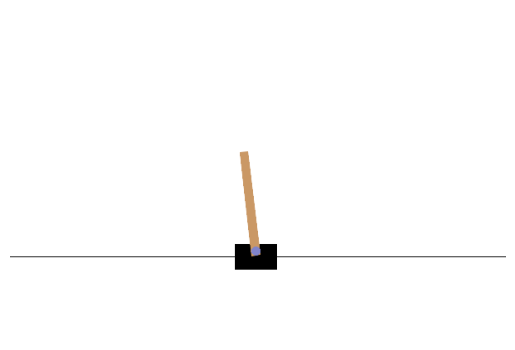

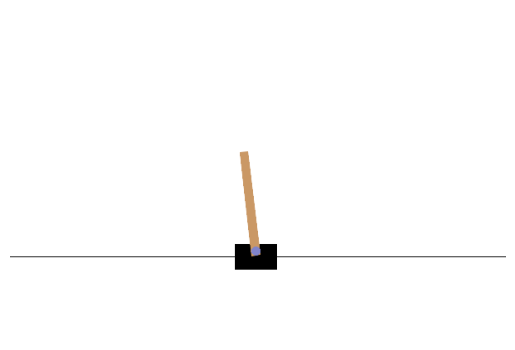

In [ ]:
import gym
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation

# 環境と状態を初期化
env = gym.make('CartPole-v1')
env.reset()

im = []
# 動画化
img = plt.imshow(env.render('rgb_array'))
for t in range(100):
    _, reward, done, _ = env.step(env.action_space.sample())
    display.clear_output(wait=True)
    img.set_data(env.render('rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    if done:
      env.reset()

以上のように、動作するが、課題としてサンプルのactionを用いずに、指令を割いて定義すること

以下にPytorchのTutrialの内容を記す



In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



# Reinforcement Learning (DQN) Tutorial
**Author**: [Adam Paszke](https://github.com/apaszke)
            [Mark Towers](https://github.com/pseudo-rnd-thoughts)


このチュートリアルでは、PyTorchを使ってDeep Q Learning (DQN)エージェントを学習する方法[Gymnasium](https://www.gymnasium.farama.org)を紹介している

**Task**

エージェントは、カートに取り付けられたポールがまっすぐに保たれるように、カートを左右どちらかに動かすという2つのアクションを決定する

[Gymnasium's website](https://gymnasium.farama.org/environments/classic_control/cart_pole/)において、より難しいタスクを含む様々なタスクが照会されている


## カートポール

エージェントが環境の現在の状態を観察し、アクションを選択すると、環境は新しい状態に*遷移*し、アクションの結果を示す報酬を返す

このタスクでは、報酬はタイムステップが増加するごとに+1され、ポールが大きく倒れるか、カートが中心から2.4ユニット以上離れると環境が終了する
- より良いパフォーマンスのシナリオがより長い時間実行され、より大きなリターンが蓄積されることを意味する

CartPoleタスクにおいて、エージェントへの入力は、環境状態（位置、速度など）を表す4つの実数値である
- これらの4つの入力をスケーリングなしで受け取り、小さな完全連結ネットワークを用いて2つの出力を獲得する
- このネットワークは、入力状態が与えられたときに、各アクションの期待値を予測するように学習される
- また、このネットワークにより、期待値が最も高いアクションが選択される

**Packages**

まず、必要なパッケージをインポートする

In [ ]:
%%bash
pip3 install gymnasium[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 9.5 MB/s eta 0:00:00


We'll also use the following from PyTorch:

-  neural networks (``torch.nn``)
-  optimization (``torch.optim``)
-  automatic differentiation (``torch.autograd``)


In [ ]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## リプレイメモリ

DQNのトレーニングには経験リプレイメモリを利用する
- このメモリはエージェントが観察した遷移を保存し、後で再利用できるようにする
- このメモリからランダムにサンプリングすることで、バッチを構成する遷移が無相関となり、DQNの学習手順が安定するようになる

そのために次の2つのクラスが定義されている

- Transition（遷移）`` - 環境内の1つの遷移を表す名前付きタプルのクラス
  - このクラスは基本的に（状態、アクション）のペアを（次の状態、報酬）の結果にマッピングする
- ReplayMemory`` - 境界サイズの周期的なバッファ
  - 最近観測された遷移を保持する
  - ``.sample()``メソッドにより、学習用の遷移をランダムに選択することができる


In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


モデルを定義する前に、DQNについて簡単に復習する

## DQNアルゴリズム

まず、環境は決定論的に表現でき、すべて定式化可能であるとみなし、その上でDQNは環境の状態が確率的に遷移することを想定したとき、その遷移の期待値を表現する

ここでは、割引を最大化しようとするポリシーを学習する

まず、累積報酬を
$R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t$
とする

$R_{t_0}$ を*return*とする

割引 $\gamma$ は $0$ から $1$ の定数であり、エージェントにとって、不確実な遠い将来からの報酬 $\gamma$ は値が小さく、近い将来 の報酬よりも重要ではない

また、エージェントは同じ報酬であっても、遠い未来の報酬よりも、時間的に近い報酬を集めるようになる

Q-ラーニングの主な考え方は次のとおりである

次の関数$Q^*: State \times Action \rightarrow \mathbb{R}$を想定する

この関数が、ある状態である行動を選択した場合どのような見返りがあるかを与える関数である場合、報酬を最大化するような政策を構築することは容易である

報酬を最大化するポリシーは次の通りとなる
\begin{align}\pi^*(s) = \arg\!\max_a \ Q^*(s, a)\end{align}

世界のすべてを知っているわけではないいため、この$Q^*$を求めることは容易ではないが、ニューラルネットワークは関数近似器であり、ニューラルネットワークを作成して$Q^*$の近似関数を獲得するように訓練すればよい

訓練には、あるポリシーのすべての$Q$関数がベルマン(Bellman)の方程式に従うことを利用する

\begin{align}Q^{\pi}(s, a) = r + \gamma Q^{\pi}(s', \pi(s'))\end{align}

この式の等号の両辺の差を$temporal difference errorと呼び、$delta$と表記する

\begin{align}\delta = Q(s, a) - (r + \gamma \max_a' Q(s', a))\end{align}

この誤差を最小化するために、[Huber 損失](https://en.wikipedia.org/wiki/Huber_loss)を使用する
- フーバー損失は、誤差が小さいときは平均二乗誤差、誤差が大きいときは平均絶対誤差のようにふるまう
- 従って、$Q$の推定値においてノイズが大きいとき、外れ値に対してよりロバストになる

リプレイメモリからサンプリングした遷移のバッチ$B$について計算する：

\begin{align}\mathcal{L} = \frac{1}{|B|}\sum_{(s, a, s', r) \ \in \ B} \mathcal{L}(\delta)\end{align}

\begin{align}\text{where} \quad \mathcal{L}(\delta) = \begin{cases}
     \frac{1}{2}{\delta^2}  & \text{for } |\delta| \le 1, \\
     |\delta| - \frac{1}{2} & \text{otherwise.}
   \end{cases}\end{align}






### Q-network

ここで構築するニューラルネットワークのモデルは、現在の画面パッチと以前の画面パッチの差を入力とするフィードフォワードのモデルである

まず、現在のスクリーンパッチと以前のスクリーンパッチの差を求める
- このモデルは、$s$をネットワークへの入力とすると、$Q(s, \mathrm{left})$とQ(s, \mathrm{right})$の2つの出力がある

このモデルは、ある入力について、ある行動をとるときの*期待収益(リターン)*を予測する



In [ ]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

## トレーニング

### ハイパーパラメータとユーティリティ

まず、モデルとそのオプティマイザをインスタンス化し、次の関連する関数を定義する

- select_action`` - ε-greedy ポリシーに従ってアクションを選択する
  - アクションの選択にモデルを使うこともあれば、ランダムなアクションを選択することもある
  - ランダムなアクションを選択する確率は ``EPS_START`` から始まり、指数関数的に ``EPS_END`` に向かって減衰します
  - 減衰速度は``EPS_DECAY``により制御される
- plot_durations`` - エピソードの継続時間をプロットするヘルパーである
  - 直近100エピソードの(公式評価に基づく指標である)平均値とともに、エピソードの継続時間をプロットする
  - プロットはメイン・トレーニング・ループを実行する際、そのセル内に表示される
  - 各エピソードの後に即時に更新される




In [ ]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

### トレーニングループ

モデルをトレーニング

``optimize_model`` 関数により1ステップ分の最適化を行う
- 最初にバッチをサンプリングし、すべてのテンソルを1つに連結する
-  $Q(s_t, a_t)$ と $V(s_{t+1}) = \max_a Q(s_{t+1}, a)$ を計算し、それらを組み合わせて損失を求める
- 定義により、$s$が終端状態であれば$V(s) = 0$とする
- 安定して$V(s_{t+1})$を計算するためにターゲットネットワークを利用する
- ターゲット・ネットワークは毎ステップ更新され、ハイパーパラメータ ``TAU`` によって制御された[ソフト更新](https://arxiv.org/pdf/1509.02971.pdf)で更新する




In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

### メインのトレーニングループ

処理内容は次の通り
- 最初に環境をリセットし、初期状態のテンソルを取得する
- 次に、アクションをサンプリング、実行した後、次の状態と報酬(常に1)を勘案してモデルを最適化する
- エピソードが終了、つまりモデルが失敗した場合、もう一度ループを再実行する
- エピソードはGPUが利用可能であれば`num_episodes`は600に設定され、そうでなければ50となる
  - CartPoleで良いパフォーマンスを観察するには50エピソードでは不十分である
  - 600のトレーニングエピソード内でモデルが500ステップを成功するように学習させる必要がある

RLエージェントのトレーニングはノイズの多いプロセスであるため、収束が観察されない場合、トレーニングをやり直すことでよい結果が得られる場合がある



Complete


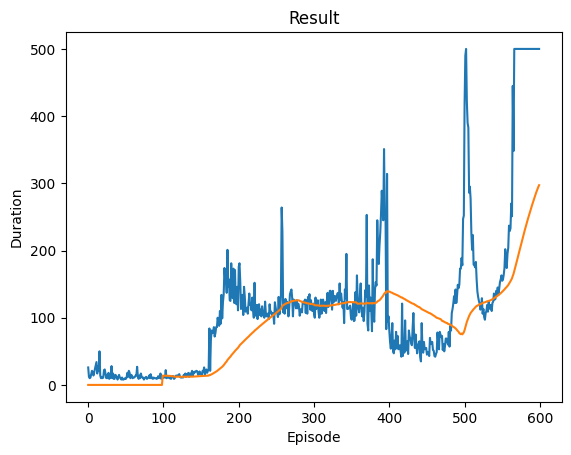

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
if torch.cuda.is_available():
    num_episodes = 600
else:
    num_episodes = 50

for i_episode in range(num_episodes):
    # Initialize the environment and get it's state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

以下は、全体的なデータの流れを示す図である。

<img src="http://class.west.sd.keio.ac.jp/dataai/text/reinforcement_learning_diagram.jpg">

- アクションはランダムもしくはポリシーに基づいて選択され、ジム環境から次のステップのサンプルを取得
- その結果をリプレイ・メモリに記録する
- 反復毎に最適化ステップを実行する
- 最適化では、新しいポリシーのトレーニングを行うために、リプレイメモリからランダムなバッチを選択する
- 古いtarget_netは、Q値の期待値を求める最適化処理で使用される
- 重みのソフト更新はステップごとに行われる

